<font color="green">

# Home task: Apriori (Association Rules) Algorithm
</font>

Mine top 10 association rules worth recommending for 
[Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
# Discover the number of entries in dataset
len(df)

38765

In [4]:
# Construct the table whose entries contain the items from each grocery check
checks_df = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
checks_df.head()

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
Name: itemDescription, dtype: object

In [5]:
# Convert grocery check data to list representetion
grocery_checks = checks_df.reset_index(drop=True).to_list()
grocery_checks[:5]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables']]

In [6]:
# Discover the number of grocery checks
len(grocery_checks)

14963

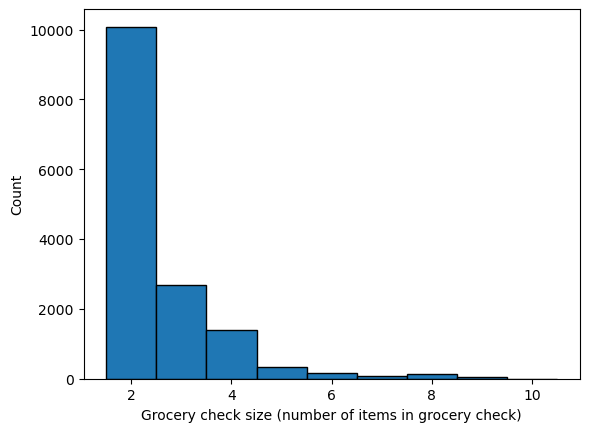

In [7]:
# Show the histogram of grocery check sizes
check_sizes = [len(check) for check in grocery_checks]
bins = np.arange(min(check_sizes) - 0.5, max(check_sizes) + 0.5)
plt.xlabel('Grocery check size (number of items in grocery check)')
plt.ylabel('Count')
plt.hist(check_sizes, bins, edgecolor='black');

On the histogram we can see that the most common grocery check size is 2 (about 10,000 checks).

In [8]:
# Build the association rules based on grocery check data using Apriory algorithm (number of items limited to between 2 and 3)
rules = apriori(grocery_checks, min_support=0.002, min_confidence=0.05, min_lift=1, max_length=3)
rules = list(filter(lambda r: len(r.items) > 1, rules))
len(rules)

18

In [9]:
def print_rules(rules):
    for i, rule in enumerate(rules):
        print(f'Rule #{i + 1}: {list(rule.items)} (support = {rule.support}):')
        for statistics in rule.ordered_statistics:
            items_base = list(statistics.items_base)
            items_add = list(statistics.items_add)
            print(f'    rule {items_base} => {items_add}')
            print(f'    confidence (i.e. conditional probability {items_add} given {items_base}) = {statistics.confidence}')
            print(f'    lift = {statistics.lift}', end='\n\n')

In [10]:
# Get top 10 association rules ordered by lift value
top_rules = sorted(rules, key=lambda r: max(r.ordered_statistics, key=lambda s: s.lift).lift, reverse=True)[:10]
print_rules(top_rules)

Rule #1: ['sausage', 'curd'] (support = 0.0029405867807257902):
    rule ['curd'] => ['sausage']
    confidence (i.e. conditional probability ['sausage'] given ['curd']) = 0.08730158730158731
    lift = 1.446615338641917

Rule #2: ['brown bread', 'canned beer'] (support = 0.0024059346387756467):
    rule ['brown bread'] => ['canned beer']
    confidence (i.e. conditional probability ['canned beer'] given ['brown bread']) = 0.06394316163410303
    lift = 1.3629366489046777

    rule ['canned beer'] => ['brown bread']
    confidence (i.e. conditional probability ['brown bread'] given ['canned beer']) = 0.05128205128205129
    lift = 1.3629366489046775

Rule #3: ['sausage', 'frozen vegetables'] (support = 0.0020717770500568067):
    rule ['frozen vegetables'] => ['sausage']
    confidence (i.e. conditional probability ['sausage'] given ['frozen vegetables']) = 0.07398568019093078
    lift = 1.2259664813919129

Rule #4: ['sausage', 'bottled beer'] (support = 0.003341575887188398):
    rule